# Tutorial 8

## Introduction

### How does KNN work?

The KNN algorithm works by comparing new data with known data (the so-called training data). Its main idea is that objects that are "close to each other" (i.e., have similar features) are more alike and should be classified in the same way. The process works as follows:

1. **Determine the number of neighbors (K)** - the user selects the number $ K $, which is how many nearest neighbors to consider for classification.
2. **Calculate distances** - for a given point (e.g., a new example that we want to classify), the algorithm calculates the distance to all other points in the training set (usually the Euclidean distance is used, but other distances, like Manhattan, can be used).
3. **Select the K nearest neighbors** - the algorithm selects $ K $ points from the training dataset that are closest to the point we want to classify.
4. **Classification/average** - based on the class (for classification) or value (for regression) of the $ K $ nearest neighbors, the algorithm assigns a label to the new point. In classification, it will usually be the most frequent class among the $ K $ neighbors, and in regression, the average value.

<br>

#### Example:

Let's assume you have a dataset about flowers with two features: petal length and width. You want to classify a new flower. The KNN algorithm will find the $ K $ most similar flowers in the training set (e.g., the 5 nearest ones) and assign a label to the new flower based on the majority (e.g., "iris-setosa," if 3 out of the 5 nearest are setosas).

<br>

#### Advantages and Disadvantages:

##### Advantages:
- Easy to understand and implement.
- Does not require training a model, works "on the fly."
- Can be used for many types of data (e.g., classification, regression).

##### Disadvantages:
- **Computational performance**: the larger the dataset, the more operations are required.
- **Sensitivity to noise and irrelevant features.**
- Requires a suitable distance metric (though in some cases it can be difficult to choose).


### Distance Metrics

#### 1. Euclidean Distance

This is the most commonly used metric, especially in classic classification and regression tasks when the data is continuous.

##### Formula:

$$
d_E = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + \dots + (x_n - y_n)^2}
$$

Where:

- $ x_1, x_2, \dots, x_n $ are the coordinates of point $ x $,
- $ y_1, y_2, \dots, y_n $ are the coordinates of point $ y $,
- $ n $ is the number of dimensions (features).

##### Example:

If we have two points in 2 dimensions: $ x = (3, 4) $ and $ y = (7, 1) $, the Euclidean distance between them is:

$$
d_E = \sqrt{(3 - 7)^2 + (4 - 1)^2} = \sqrt{(-4)^2 + 3^2} = \sqrt{16 + 9} = \sqrt{25} = 5
$$

<br>

#### 2. Manhattan Distance

This is an alternative measure that sums the differences in coordinates along each axis. It is particularly useful when the data is organized in a grid (e.g., in problems related to movement in cities).

##### Formula:

$$
d_M = |x_1 - y_1| + |x_2 - y_2| + \dots + |x_n - y_n|
$$

##### Example:

For the points $ x = (3, 4) $ and $ y = (7, 1) $, the Manhattan distance is:

$$
d_M = |3 - 7| + |4 - 1| = 4 + 3 = 7
$$

<br>

#### 3. Minkowski Distance

This is a general form of the two metrics above. The Minkowski distance can take different values depending on the parameter $ p $.

##### Formula:

$$
d_M = \left( |x_1 - y_1|^p + |x_2 - y_2|^p + \dots + |x_n - y_n|^p \right)^{1/p}
$$

When $ p = 1 $, the Minkowski distance is equal to the Manhattan distance.

When $ p = 2 $, it is the Euclidean distance.

##### Example:

For the points $ x = (3, 4) $ and $ y = (7, 1) $, if $ p = 3 $:

$$
d_M = \left( |3 - 7|^3 + |4 - 1|^3 \right)^{1/3} = \left( 4^3 + 3^3 \right)^{1/3} = \left( 64 + 27 \right)^{1/3} = 91^{1/3} \approx 4.5
$$

<br>

#### Summary

Depending on the characteristics of the data and the problem, you can choose the appropriate distance metric:

- **Euclidean** - most commonly used for general tasks (continuous data).
- **Manhattan** - for data that describes "movement" in a grid.
- **Minkowski** - a general form, allowing experimentation with the parameter $ p $.


## Exercise 1
For the `load_wine` dataset from the `sklearn.datasets` module, perform a DEA analysis and classify the `target` feature using `KNN`. Test the model's performance for different values of `k-neighbors`. Remember to scale the data.

<br>

Example of loading data:


```
from sklearn.datasets import load_wine

wine = load_wine()

X = wine.data
y = wine.target
```

## Exercise 2
For the `fetch_california_housing` dataset from the `sklearn.datasets` module, perform a DEA analysis and regression using `KNN`. Test the model's performance for different values of `k-neighbors`. Remember to scale the data.

<br>

Example of loading data:

```
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = data.data
y = data.target
```

In [2]:
import math

x = (3, 4)
y = (7, 1)


def euclidean_distance(x, y):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(x, y)))


def manhattan_distance(x, y):
    return sum(abs(a - b) for a, b in zip(x, y))

def minkowski_distance(x, y, p):
    return sum(abs(a - b) ** p for a, b in zip(x, y)) ** (1 / p)

# Example outputs
print("Euclidean Distance:", euclidean_distance(x, y))
print("Manhattan Distance:", manhattan_distance(x, y))
print("Minkowski Distance (p=3):", minkowski_distance(x, y, 3))

Euclidean Distance: 5.0
Manhattan Distance: 7
Minkowski Distance (p=3): 4.497941445275415


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

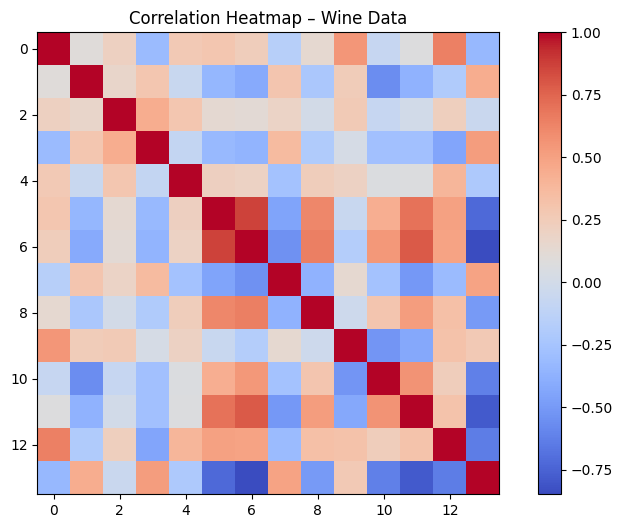

k=1: accuracy=0.9722
k=2: accuracy=0.9444
k=3: accuracy=0.9722
k=4: accuracy=0.9444
k=5: accuracy=0.9722
k=6: accuracy=0.9722
k=7: accuracy=1.0000
k=8: accuracy=1.0000
k=9: accuracy=1.0000
k=10: accuracy=1.0000
k=11: accuracy=1.0000
k=12: accuracy=1.0000
k=13: accuracy=1.0000
k=14: accuracy=0.9722
k=15: accuracy=1.0000
k=16: accuracy=1.0000
k=17: accuracy=1.0000
k=18: accuracy=0.9722
k=19: accuracy=1.0000
k=20: accuracy=1.0000


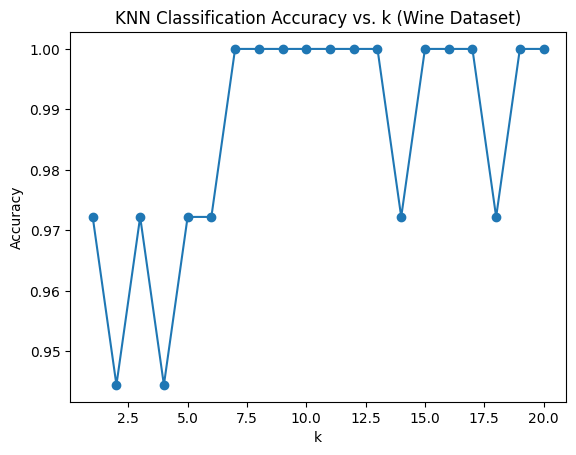

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

wine = load_wine()
X = wine.data
y = wine.target

df = pd.DataFrame(X, columns=wine.feature_names)
df["target"] = y

print(df.head())
print(df.describe())
print(df["target"].value_counts())


plt.figure(figsize=(10,6))
plt.imshow(df.corr(), cmap='coolwarm')
plt.colorbar()
plt.title("Correlation Heatmap – Wine Data")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

for k, acc in zip(k_values, accuracies):
    print(f"k={k}: accuracy={acc:.4f}")

plt.plot(k_values, accuracies, marker='o')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN Classification Accuracy vs. k (Wine Dataset)")
plt.show()


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%       

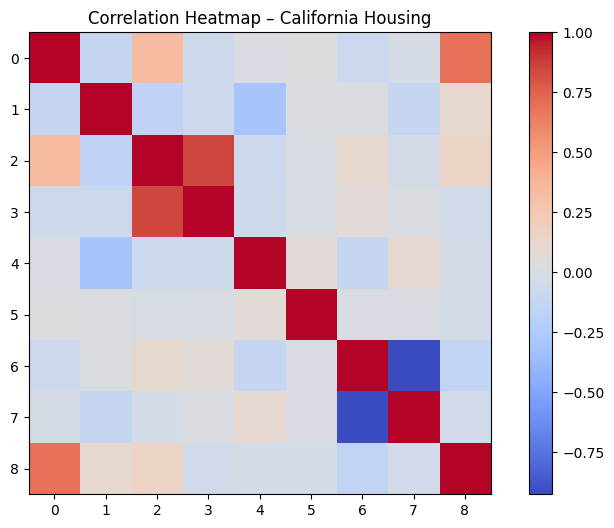

k=1: MSE=0.6690, R²=0.4895
k=2: MSE=0.5229, R²=0.6010
k=3: MSE=0.4667, R²=0.6439
k=4: MSE=0.4474, R²=0.6586
k=5: MSE=0.4324, R²=0.6700
k=6: MSE=0.4291, R²=0.6725
k=7: MSE=0.4283, R²=0.6731
k=8: MSE=0.4245, R²=0.6760
k=9: MSE=0.4246, R²=0.6760
k=10: MSE=0.4215, R²=0.6783
k=11: MSE=0.4186, R²=0.6806
k=12: MSE=0.4182, R²=0.6809
k=13: MSE=0.4163, R²=0.6823
k=14: MSE=0.4179, R²=0.6811
k=15: MSE=0.4188, R²=0.6804
k=16: MSE=0.4210, R²=0.6787
k=17: MSE=0.4211, R²=0.6787
k=18: MSE=0.4214, R²=0.6784
k=19: MSE=0.4218, R²=0.6781
k=20: MSE=0.4235, R²=0.6768


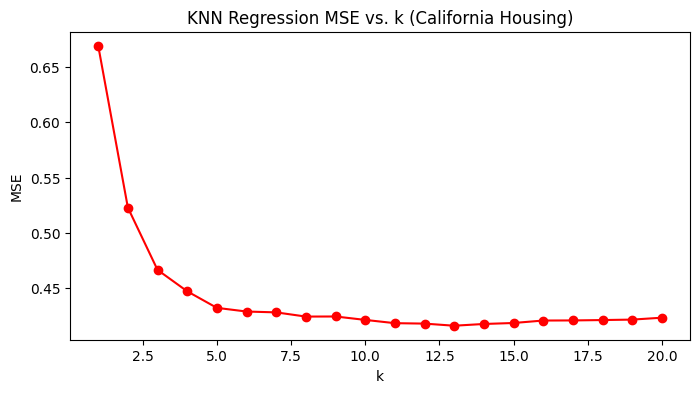

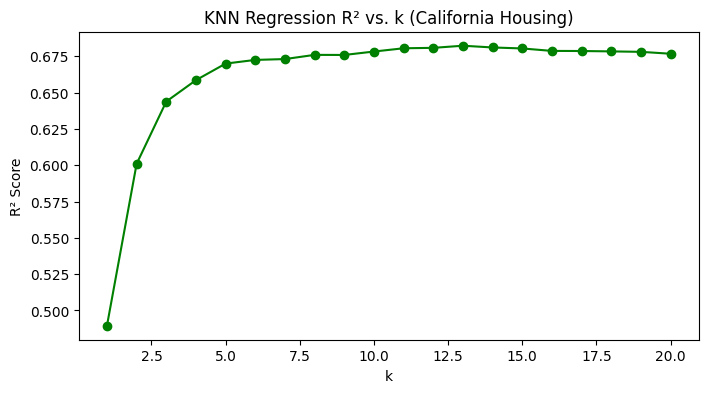

In [7]:
# Exercise 2: California housing – EDA + KNN Regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load data
data = fetch_california_housing()
X = data.data
y = data.target

# ---- Basic EDA ----
df = pd.DataFrame(X, columns=data.feature_names)
df["target"] = y

print(df.head())
print(df.describe())

# Optional: visualize correlations
plt.figure(figsize=(10,6))
plt.imshow(df.corr(), cmap='coolwarm')
plt.colorbar()
plt.title("Correlation Heatmap – California Housing")
plt.show()

# ---- Train-test split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---- Scaling ----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---- KNN Regression for different k ----
k_values = range(1, 21)
mse_scores = []
r2_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# ---- Results ----
for k, mse, r2 in zip(k_values, mse_scores, r2_scores):
    print(f"k={k}: MSE={mse:.4f}, R²={r2:.4f}")

plt.figure(figsize=(8,4))
plt.plot(k_values, mse_scores, marker='o', color='red')
plt.xlabel("k")
plt.ylabel("MSE")
plt.title("KNN Regression MSE vs. k (California Housing)")
plt.show()

plt.figure(figsize=(8,4))
plt.plot(k_values, r2_scores, marker='o', color='green')
plt.xlabel("k")
plt.ylabel("R² Score")
plt.title("KNN Regression R² vs. k (California Housing)")
plt.show()
